<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/Optimize/SomaPesos_includeArea_extra_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import cluster, covariance, manifold
import numpy as np
from sklearn.metrics import r2_score
import math
import matplotlib.pyplot as plt

In [2]:
!gdown 1ntRwkzL7SBkPIkf6nCpZG-xLmj8G_7su

Downloading...
From: https://drive.google.com/uc?id=1ntRwkzL7SBkPIkf6nCpZG-xLmj8G_7su
To: /content/custos_versao_jun_17_2023.xlsx
100% 29.5k/29.5k [00:00<00:00, 65.6MB/s]


In [3]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#sphx-glr-auto-examples-applications-plot-stock-market-py

In [4]:
df =pd.read_excel('custos_versao_jun_17_2023.xlsx')
df = df.drop(['Local','Barragens'],axis=1)
names = df.columns

In [5]:
df.shape

(21, 79)

In [6]:
k, list_ = 0, []
for test in df.std()== 0:
  if test == True:
    list_.append(names[k])
    print(names[k])
  k = k + 1
print(list_)

Risco à saúde humana?
Risco ecológico?
Planejamento
Desmontagem e demolições de estruturas
Barreira subsuperficial de baixa permeabilidade
Cobertura para quebra de capilaridade
Aterro de conquista para construção de cobretura
Cobertura impermeável
Impermeabilização de fundo
Remoção de solo contaminado
Desvio de curso d'água
Dragagem de sedimentos
Reforço de barramento
Selagem de acesso
Tamponamento de acesso
Escarificação do solo
Instalação de cerca
['Risco à saúde humana?', 'Risco ecológico?', 'Planejamento', 'Desmontagem e demolições de estruturas', 'Barreira subsuperficial de baixa permeabilidade', 'Cobertura para quebra de capilaridade', 'Aterro de conquista para construção de cobretura', 'Cobertura impermeável', 'Impermeabilização de fundo', 'Remoção de solo contaminado', "Desvio de curso d'água", 'Dragagem de sedimentos', 'Reforço de barramento', 'Selagem de acesso', 'Tamponamento de acesso', 'Escarificação do solo', 'Instalação de cerca']


<ipython-input-6-8c3012133e5a>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  for test in df.std()== 0:


In [7]:
df = df.drop(list_, axis=1)
df.shape

(21, 62)

In [8]:
df.describe()

,Custo_barragem,Area,altura,volume,Estuda_levanta,Revisa,pilha_deposito,mina,ins_ind,patio_estoca,...,Geotécnico,Sistemas de drenagem,Focos erosivos,Água subterrânea,Água superficial,Vegetação,Fauna,Sistemas de drenagem.1,Focos erosivos.1,Vegetação.1
count,2.100000e+01,21.000000,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2.919502e+07,195.312381,44.764762,4.671224e+07,1.777619e+06,5.662190e+06,4.335526e+07,2.455615e+07,4.878431e+07,6.489354e+06,...,0.809524,0.857143,0.333333,0.809524,0.857143,0.857143,0.571429,0.714286,0.285714,0.857143
std,4.114073e+07,249.618104,28.623733,9.501873e+07,9.300339e+05,2.004255e+06,3.542446e+07,1.726332e+07,3.503760e+07,3.900372e+06,...,0.402374,0.358569,0.483046,0.402374,0.358569,0.358569,0.507093,0.462910,0.462910,0.358569
min,1.785789e+05,1.300000,8.000000,0.000000e+00,8.480000e+05,3.460794e+06,1.191930e+07,5.001354e+06,4.818645e+06,2.748572e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.426628e+06,30.000000,23.000000,1.300000e+06,1.080000e+06,3.755267e+06,2.247754e+07,1.717015e+07,1.793396e+07,5.369193e+06,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.038845e+07,89.000000,33.000000,7.150000e+06,1.080000e+06,5.305567e+06,2.247754e+07,1.717015e+07,7.568455e+07,7.102735e+06,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,3.928855e+07,242.000000,62.000000,3.000000e+07,2.928000e+06,8.537140e+06,9.763425e+07,2.423825e+07,8.310580e+07,7.102735e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.536381e+08,856.000000,110.000000,3.440000e+08,2.928000e+06,8.537140e+06,9.763425e+07,7.239979e+07,8.310580e+07,1.418090e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
'''edge_model = covariance.GraphicalLassoCV(verbose=True)
X = df.copy()
X /= X.std(axis=0)
edge_model.fit(X)'''

'edge_model = covariance.GraphicalLassoCV(verbose=True)\nX = df.copy()\nX /= X.std(axis=0)\nedge_model.fit(X)'

In [10]:
X = df.copy()
X /= X.std(axis=0)

names = X.columns
new_drop = []
for word in names:
  list_ = X[word].values
  for w in list_:
    if math.isnan(w) == True :
      print(word)
      new_drop.append(word)
      #print(list_)
      break

print(X.shape)
X = X.drop(new_drop,axis=1)
print(X.shape)

Ano de fechamento da estrutura
Cobertura de baixa permeabilidade
Tratamento de efluentes
Tamponamento de tulipa
Colocação do solo
Construção de berma de proteção
(21, 62)
(21, 56)


<ipython-input-10-b25204677a14>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X /= X.std(axis=0)


In [11]:
pd.set_option('display.max_columns', None)
#X

In [12]:
new_drop =['As Built','Ano de encerramento da operação da estrutura']
X = X.drop(new_drop,axis=1)
#X

In [13]:
# delete this module if necessary
alphas = np.logspace(-1.5, 1, num=10)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)

# standardize the time series: using correlations rather than covariance
# former is more efficient for structure recovery

edge_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:268: RuntimeWarning: divide by zero encountered in double_scalars
  precision_[idx, idx] = 1.0 / (
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:272: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:273: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = -precision_[idx, idx] * coefs
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:297: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.045e-01
  warnings.warn(


GraphicalLassoCV(alphas=array([ 0.03162278,  0.05994843,  0.11364637,  0.21544347,  0.40842387,
        0.77426368,  1.46779927,  2.7825594 ,  5.27499706, 10.        ]))

In [14]:
#X

In [15]:
_, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=0)
n_labels = labels.max()

In [16]:
#X

In [17]:
names =X.columns
names

Index(['Custo_barragem', 'Area', 'altura', 'volume', 'Estuda_levanta',
       'Revisa', 'pilha_deposito', 'mina', 'ins_ind', 'patio_estoca', 'infra',
       'ponds', 'custo_geral', 'monitora', 'manute', 'Estrutura em operação?',
       'Área já recuperada?', 'Dados geotécnicos disponíveis?',
       'Topografia disponível?', 'Estrutura estável ao final da operação?',
       'FS aceitável ao final da operação?',
       'Preenchida com estéril ou rejeito ao final da operação?',
       'Presença de focos erosivos ao final da operação?',
       'Lago ao final da operação?', 'Vertimento ou bombeamento?',
       'Dados geoquímicos ou de investigação disponíveis?',
       'Solo contaminado?', 'Água subterrânea contaminada?',
       'Material de superficie/solo de cobretura contaminado?',
       'Possibilidade de mobilização de contaminantes?',
       'Desmontagem e remoção de equipamentos, tubulações e estruturas metálicas',
       'Esgotamento de reservatório', 'Abertura de brecha',
       'R

In [18]:
for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(names[labels == i])}")

Cluster 1: Area, altura, volume, mina, Movimentação de material (estéril ou rejeito)
Cluster 2: Revisa, pilha_deposito, manute, Área já recuperada?, Remoção de barramento/dique
Cluster 3: Estuda_levanta, ins_ind, patio_estoca, ponds, monitora, Possibilidade de mobilização de contaminantes?, Desmontagem e remoção de equipamentos, tubulações e estruturas metálicas, Focos erosivos
Cluster 4: infra, Estrutura em operação?, Solo contaminado?, Drenagem superficial, Controle de focos erosivos, Preparação do solo, Fauna
Cluster 5: custo_geral, Dados geotécnicos disponíveis?, Topografia disponível?, Dados geoquímicos ou de investigação disponíveis?
Cluster 6: Estrutura estável ao final da operação?, FS aceitável ao final da operação?, Água superficial
Cluster 7: Lago ao final da operação?, Vertimento ou bombeamento?, Instalação de sinalização
Cluster 8: Custo_barragem, Presença de focos erosivos ao final da operação?, Água subterrânea contaminada?, Material de superficie/solo de cobretura conta

In [19]:
df[names[labels == 7]]

,Custo_barragem,Presença de focos erosivos ao final da operação?,Água subterrânea contaminada?,Material de superficie/solo de cobretura contaminado?,Abertura de brecha,Retaludamento,Construção de vertedouro,Outras ações de fechamento,Focos erosivos.1
0,1.149727e+08,1,1,1,1,1,1,1,1
1,1.536381e+08,1,1,1,1,1,1,1,1
2,2.465616e+07,0,1,1,1,0,1,1,1
3,1.111535e+07,0,0,1,1,0,0,0,0
4,6.426628e+06,0,0,0,0,0,0,1,0
5,5.740935e+05,0,0,0,0,0,0,1,0
6,5.698860e+05,0,0,0,0,0,0,1,0
7,1.785789e+05,0,0,0,1,0,0,0,0
8,9.793428e+06,0,0,0,0,0,0,0,0
9,1.038845e+07,1,0,0,0,0,0,0,0


In [20]:
df[names[labels == 7]].columns

Index(['Custo_barragem', 'Presença de focos erosivos ao final da operação?',
       'Água subterrânea contaminada?',
       'Material de superficie/solo de cobretura contaminado?',
       'Abertura de brecha', 'Retaludamento', 'Construção de vertedouro',
       'Outras ações de fechamento', 'Focos erosivos.1'],
      dtype='object')

In [21]:
X = df[names[labels == 7]].drop(['Custo_barragem'],axis=1)
y = df[names[labels == 7]]['Custo_barragem']

In [22]:
#X

In [23]:
import numpy as np
from scipy.optimize import differential_evolution

In [24]:
matrix = np.array(X)
cost = np.array(y)
matrix.shape,cost.shape

((21, 8), (21,))

In [25]:
matrix # note que os 8 ultimos casos tem tudo zero... nao da para diferenciar
# matrix # adicao da area para utilizar como forma de diferenciar os q sao iguais????

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
#df

In [27]:
matrix = df[names[labels == 7]].drop(['Custo_barragem'],axis=1)
matrix['Area']=np.array(df['Area'])/max(np.array(df['Area']))
#X['altura']=df['altura']
matrix = np.array(matrix)

In [28]:
matrix

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.25233645],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.28271028],
       [0.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        , 1.        , 0.03504673],
       [0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.3271028 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.02102804],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.00771028],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.00151869],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.10514019],


In [29]:
DE_num = 2*matrix.shape[1]
DE_num

18

In [30]:
cost = 100*cost/max(cost) # delete this line if not working with 0,1 all costs

def mine_score(x,M=matrix,y_true=cost,resp=False):
  rows=M.shape[0]
  cols =M.shape[1]
  w = x.reshape(2,cols)
  w[1,cols-1] = w[0,cols-1] # fazer a ultima coluna igual pq so tem um elemento

  y_pred,fobj   = [], 0
  for i in range(rows):
    yi = 0
    for j in range(cols):
      if j != cols -1:
        if M[i,j] == 1:
          yi +=  w[1,j]
        else:
          yi +=  w[0,j]
      else:
        yi += w[0,j]*M[i,j]
    y_pred.append(yi)
  y_pred = np.array(y_pred)

  #fobj = (1-r2_score(y_true, y_pred))**2
  for i in range(rows):
    fobj += (y_true[i]-y_pred[i])**2



  if resp== False:
    return fobj
  else:
    return r2_score(y_true, y_pred),y_pred


In [31]:
DE_num = 2*matrix.shape[1]
#bounds = [(-1, 1)]*DE_num
bounds = [(0, 100)]*DE_num
result = differential_evolution(mine_score, bounds, seed=1,maxiter=100, popsize=300)
result.x, result.fun

(array([0.00000000e+00, 0.00000000e+00, 2.28102235e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.52733588e+01, 1.40919264e-03, 9.46403194e-01, 0.00000000e+00,
        0.00000000e+00, 6.31668101e+01, 9.51978622e-01, 0.00000000e+00,
        1.29136477e+01, 5.72517096e+01]),
 715.798046314556)

In [32]:
print('r-score',mine_score(result.x,resp=True))

r-score (0.9500869084595976, array([86.88100295, 87.95239002, 16.04824539, 11.53801456,  3.02275186,
        2.55298984,  2.33459171,  5.98966989,  5.9484627 ,  6.76165363,
       16.14841253, 17.61765314, 50.46802889, 14.94564162,  8.26925191,
       31.95020266, 29.80742852,  3.5172382 ,  5.57759794,  2.61067991,
        5.08311161]))


In [33]:
cols =matrix.shape[1]
w = result.x.reshape(2,cols)
print(w)

[[0.00000000e+00 0.00000000e+00 2.28102235e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.52733588e+01]
 [1.40919264e-03 9.46403194e-01 0.00000000e+00 0.00000000e+00
  6.31668101e+01 9.51978622e-01 0.00000000e+00 1.29136477e+01
  3.52733588e+01]]


In [34]:
pd.DataFrame(matrix)

,0,1,2,3,4,5,6,7,8
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.252336
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.282710
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.035047
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.327103
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.021028
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.007710
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.001519
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.105140
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103972
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126986


In [35]:
n = w.shape[0]
w[1,n-1] = w[n-1,0]
pesos = pd.DataFrame(w) # matriz de pesos usados primeiro para 1 e segundo para zero
pesos

,0,1,2,3,4,5,6,7,8
0,0.000000,0.000000,2.281022,0.0,0.00000,0.000000,0.0,0.000000,35.273359
1,0.001409,0.001409,0.000000,0.0,63.16681,0.951979,0.0,12.913648,35.273359


In [36]:
matrix = df[names[labels == 7]].drop(['Custo_barragem'],axis=1)
matrix['Area']=np.array(df['Area'])/max(np.array(df['Area']))
names = matrix.columns

In [37]:
pesos.columns = names
pesos

,Presença de focos erosivos ao final da operação?,Água subterrânea contaminada?,Material de superficie/solo de cobretura contaminado?,Abertura de brecha,Retaludamento,Construção de vertedouro,Outras ações de fechamento,Focos erosivos.1,Area
0,0.000000,0.000000,2.281022,0.0,0.00000,0.000000,0.0,0.000000,35.273359
1,0.001409,0.001409,0.000000,0.0,63.16681,0.951979,0.0,12.913648,35.273359


In [38]:
pesos.T

,0,1
Presença de focos erosivos ao final da operação?,0.000000,0.001409
Água subterrânea contaminada?,0.000000,0.001409
Material de superficie/solo de cobretura contaminado?,2.281022,0.000000
Abertura de brecha,0.000000,0.000000
Retaludamento,0.000000,63.166810
Construção de vertedouro,0.000000,0.951979
Outras ações de fechamento,0.000000,0.000000
Focos erosivos.1,0.000000,12.913648
Area,35.273359,35.273359


In [39]:
r2,y_pred = mine_score(result.x,resp=True)

In [41]:
y_pred = y_pred*max(y)/100

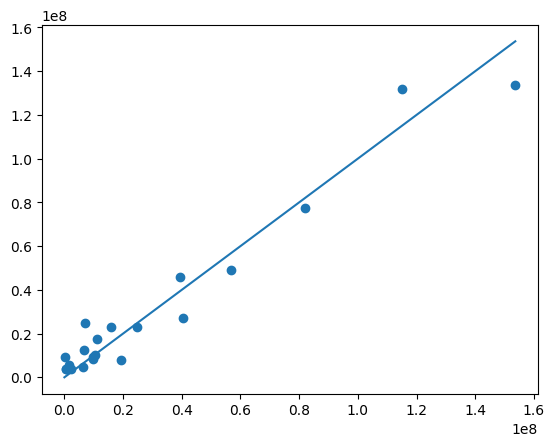

In [45]:
plt.scatter(y,y_pred)
plt.plot([0,max(y)],[0,max(y)])